# Ratio de Sharpe et valeurs du portefeuille

In [1]:
import pandas as pd

In [2]:
import quandl

## Creéer un Portefeuille

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
quandl.ApiConfig.api_key = "GpVgeVazag5mR7JaB3Gn"
# Nous avons pris un tas d'actions technologiques pour notre portefeuille
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [5]:
# Alternatives
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [6]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Normaliser les Prix

C'est la même chose que les rendements quotidiens cumulatifs.

In [7]:
# Exemple
aapl.iloc[0]['Adj. Close']

52.848786580038

In [8]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [9]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [10]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


## Répartitions

Imaginons que nous ayons les répartitions suivantes pour l'ensemble de notre portefeuille :

* 30% d'Apple
* 20% de Cisco
* 40% d'Amazon
* 10% d'IBM

Faisons en sorte que ces valeurs soient reflétées en multipliant notre Rendement Standard par notre répartition

In [11]:
for stock_df,allo in zip([aapl,cisco,amzn,ibm],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [12]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investissement

Imaginons qu'on ait investi un million de dollars dans ce portefeuille

In [13]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Valeur totale du Portefeuille

In [14]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [15]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665


In [16]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [17]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665


In [18]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [19]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

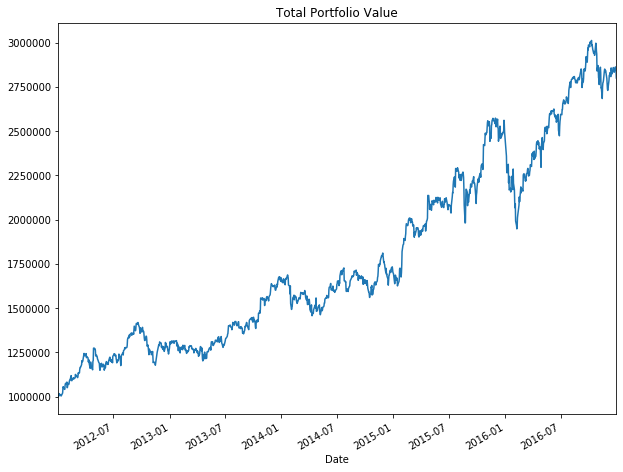

In [21]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

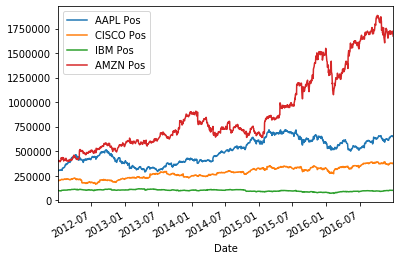

In [22]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [23]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,101839.988903,1.699358e+06,2.831931e+06
2016-12-27,657413.396830,379323.596496,102102.667778,1.723510e+06,2.862350e+06
2016-12-28,654610.167268,376108.989746,101522.330729,1.725141e+06,2.857383e+06
2016-12-29,654441.973495,376603.544631,101772.791982,1.709546e+06,2.842364e+06
2016-12-30,649340.095692,373636.215323,101400.154508,1.675406e+06,2.799783e+06


# Statistiques du Portefeuille
### Rendements Quotidiens

In [24]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Rendement Cumulatif

In [25]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Notre rendement était de {} %!'.format(cum_ret))

Notre rendement était de 179.97828220000912 %!


### Rendement Quotidien Moyen

In [26]:
portfolio_val['Daily Return'].mean()

0.0009023579071769599

### Ecart-Type du Rendement Quotidien

In [27]:
portfolio_val['Daily Return'].std()

0.012896893878458078

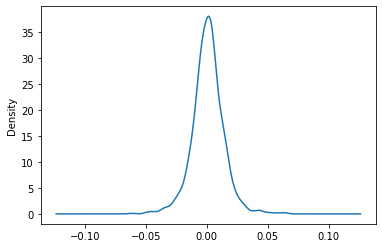

In [28]:
portfolio_val['Daily Return'].plot(kind='kde')

# Ratio de Sharpe

Le ratio de Sharpe est une mesure permettant de calculer le rendement ajusté en fonction du risque, et ce ratio est devenu la norme de l'industrie pour de tels calculs. 

Le ratio de Sharpe mesure la rentabilité excédentaire par rapport au taux de l'argent sans risque d'un portefeuille d'actifs divisé par l'écart type de cette rentabilité. C'est donc une mesure de la rentabilité marginale par unité de risque. Il permet de mesurer les performances de gérants pratiquant des politiques de risque différentes.

Ratio de Sharpe = (Rendement moyen du portefeuille - Taux sans risque)/Écart type du rendement du portefeuille

Le rapport de Sharpe original

Ratio de Sharpe Annuel = K-value * SR

K-values pour divers taux d'échantillonnage:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Aux USA, on utilise un taux sans risque très bas (le taux que vous obtiendriez si vous placez votre argent dans une banque, il est actuellement très bas aux USA, disons juste son rendement de ~0%). Si vous êtes dans un pays différent avec des taux plus élevés pour votre devise de trading, vous pouvez utiliser cette astuce pour convertir un taux annuel avec un taux quotidien :

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

D'autres valeurs que les gens utilisent sont des choses comme le bon du Trésor à 3 mois: [LIBOR](http://www.investopedia.com/terms/l/libor.asp) ou [WIkipédia LIBOR](https://fr.wikipedia.org/wiki/Libor)

Plus de lectures sur le Sharpe Ratio (SR): https://educationfinance.ca/investissements/ratio-de-sharpe/

In [29]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [30]:
SR

0.0699670723571809

In [31]:
ASR = (252**0.5)*SR

In [32]:
ASR

1.1106928405221748

In [33]:
portfolio_val['Daily Return'].std()

0.012896893878458078

In [34]:
portfolio_val['Daily Return'].mean()

0.0009023579071769599

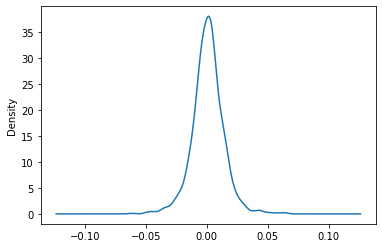

In [35]:
portfolio_val['Daily Return'].plot(kind='kde')

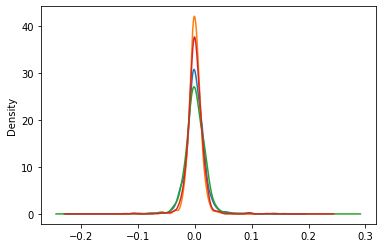

In [36]:
aapl['Adj. Close'].pct_change(1).plot(kind='kde')
ibm['Adj. Close'].pct_change(1).plot(kind='kde')
amzn['Adj. Close'].pct_change(1).plot(kind='kde')
cisco['Adj. Close'].pct_change(1).plot(kind='kde')

In [37]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

# Bon Travail!